In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
#plt.style.use(mplhep.style.CMS)

In [2]:
#proton_selection = "SingleRP"
proton_selection = "MultiRP"

# Signal

In [3]:
df_signal = None
event_counts_signal = None
selections_str_signal = None

#fileName_signal = "output/output-MC2017-Elastic-PreSel.h5"
#fileName_signal = "output/output-MC2017-Elastic-ExclSel.h5"
fileName_signal = "output/output-MC2017-Elastic-Non3+3-PreSel.h5"
#fileName_signal = "output/output-MC2017-Elastic-Non3+3-PreSel-Pt1_30-Pt2_20.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-PreSel.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-ExclSel.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-Non3+3-PreSel.h5"
#fileName_signal = "output/output-MC2017-SingleDissociation-Non3+3-PreSel-Pt1_30-Pt2_20.h5"

with h5py.File( fileName_signal, 'r' ) as f:
    print ( list(f.keys()) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns = list( dset_columns )
    print ( columns )
    columns_str = [ item.decode("utf-8") for item in columns ]
    print ( columns_str )
    
    dset_counts = f['event_counts']
    event_counts_signal = list( dset_counts )
    print ( event_counts_signal )
    
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str_signal = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str_signal )
    
    df_signal = pd.DataFrame( dset, columns=columns_str )
    
    print ( df_signal )

['columns', 'event_counts', 'protons', 'selections']
(213536, 43)
[[1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 9.1376482e-04
  2.3529863e-02 4.4119707e-03]
 [1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 8.7998388e-04
  4.5879604e-03 8.1510313e-02]
 [1.0000000e+00 1.0000000e+00 4.2949673e+09 ... 8.7998388e-04
  4.5879604e-03 8.1510313e-02]
 ...
 [1.0000000e+00 7.5600000e+02 4.2949673e+09 ... 2.6697566e-04
  2.1097749e-03 4.5376737e-02]
 [1.0000000e+00 7.5600000e+02 4.2949673e+09 ... 1.8521260e-04
  3.6291495e-02 3.0596652e-03]
 [1.0000000e+00 7.5600000e+02 4.2949673e+09 ... 1.8521260e-04
  3.6291495e-02 3.0596652e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Trac

In [4]:
df_counts_signal = pd.Series( event_counts_signal, index=selections_str_signal);
df_counts_signal

All        178402
Muon       166756
Vertex     149608
Protons     91429
dtype: int64

In [5]:
#msk_invmass = ( df_signal["InvMass"] >= 110. )
#df_signal = df_signal[msk_invmass]
df_signal

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,Muon1Eta,Muon1Phi,Muon1VtxZ,nVertices,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,1.0,1.0,4.294967e+09,5.0,0.0,150.0,0.0,-999.0,23.0,-1.0,...,1.164667,2.705973,-0.882422,32.0,-0.880501,132.454605,34.0,0.000914,0.023530,0.004412
1,1.0,1.0,4.294967e+09,3.0,0.0,150.0,0.0,-999.0,103.0,-1.0,...,-1.007581,2.132689,3.432269,20.0,3.430571,251.395355,16.0,0.000880,0.004588,0.081510
2,1.0,1.0,4.294967e+09,3.0,0.0,150.0,0.0,-999.0,123.0,-1.0,...,-1.007581,2.132689,3.432269,20.0,3.430571,251.395355,16.0,0.000880,0.004588,0.081510
3,1.0,1.0,4.294967e+09,3.0,0.0,150.0,1.0,1.0,103.0,123.0,...,-1.007581,2.132689,3.432269,20.0,3.430571,251.395355,16.0,0.000880,0.004588,0.081510
4,1.0,1.0,4.294967e+09,12.0,0.0,150.0,0.0,-999.0,3.0,-1.0,...,1.151121,2.015797,2.280747,21.0,2.282250,126.690613,4.0,0.001160,0.055618,0.001708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213531,1.0,756.0,4.294967e+09,75596.0,0.0,130.0,0.0,-999.0,103.0,-1.0,...,-0.969275,-2.321650,0.998009,30.0,0.996049,127.194374,3.0,0.000267,0.002110,0.045377
213532,1.0,756.0,4.294967e+09,75596.0,0.0,130.0,0.0,-999.0,123.0,-1.0,...,-0.969275,-2.321650,0.998009,30.0,0.996049,127.194374,3.0,0.000267,0.002110,0.045377
213533,1.0,756.0,4.294967e+09,75596.0,0.0,130.0,1.0,1.0,103.0,123.0,...,-0.969275,-2.321650,0.998009,30.0,0.996049,127.194374,3.0,0.000267,0.002110,0.045377
213534,1.0,756.0,4.294967e+09,75600.0,0.0,130.0,0.0,-999.0,3.0,-1.0,...,1.379720,0.297507,-5.423633,29.0,-5.422969,136.952225,0.0,0.000185,0.036291,0.003060


In [6]:
df_signal_events = df_signal.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_signal_events = df_signal_events[ ~df_signal_events.index.duplicated(keep='first') ]

#msk_invmass = ( df_signal_events["InvMass"] >= 110. )
#df_signal_events = df_signal_events[msk_invmass]

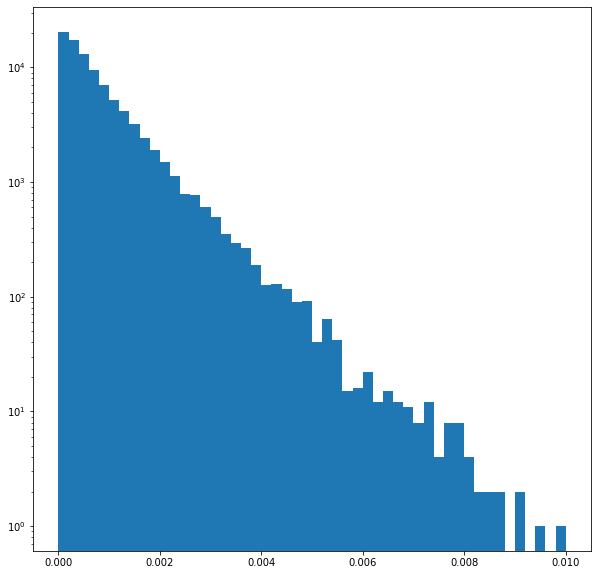

In [7]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["Acopl"], bins=50, range=(0.,0.01) )
plt.yscale( "log" )

(array([40607., 19045., 10171.,  5964.,  3608.,  2479.,  1664.,  1236.,
          928.,   658.,   549.,   435.,   349.,   248.,   279.,   223.,
          179.,   184.,   173.,   257.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

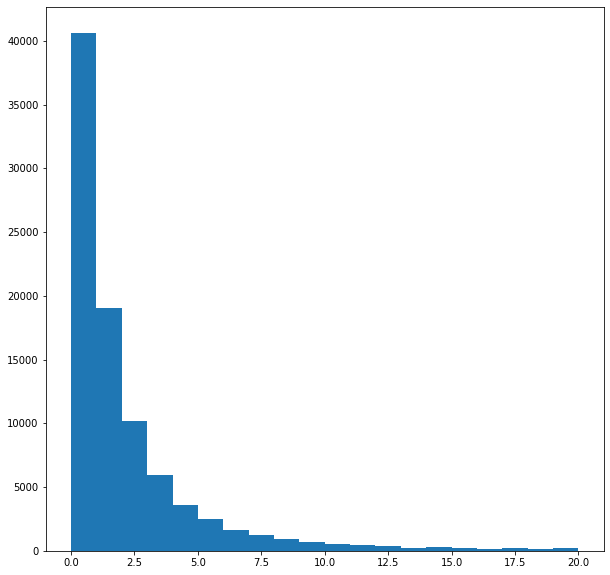

In [8]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["ExtraPfCands"], bins=20, range=(0.,20) )
#plt.yscale( "log" )

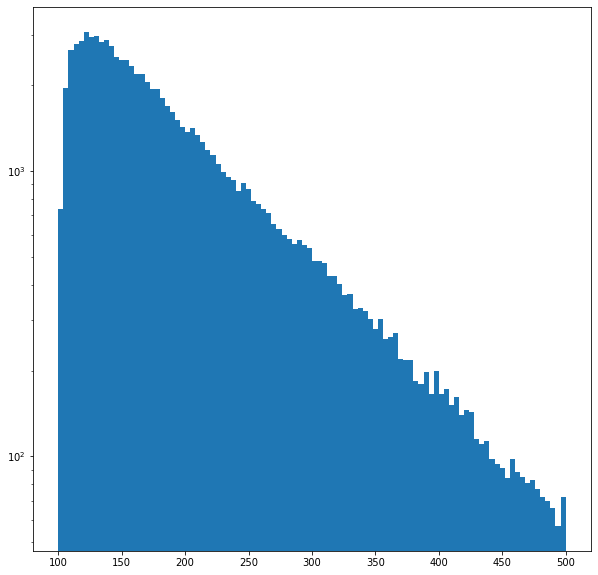

In [9]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_signal_events["InvMass"], bins=100, range=(100.,500) )
plt.yscale( "log" )

16514 15465


Text(0, 0.5, 'Y (mm)')

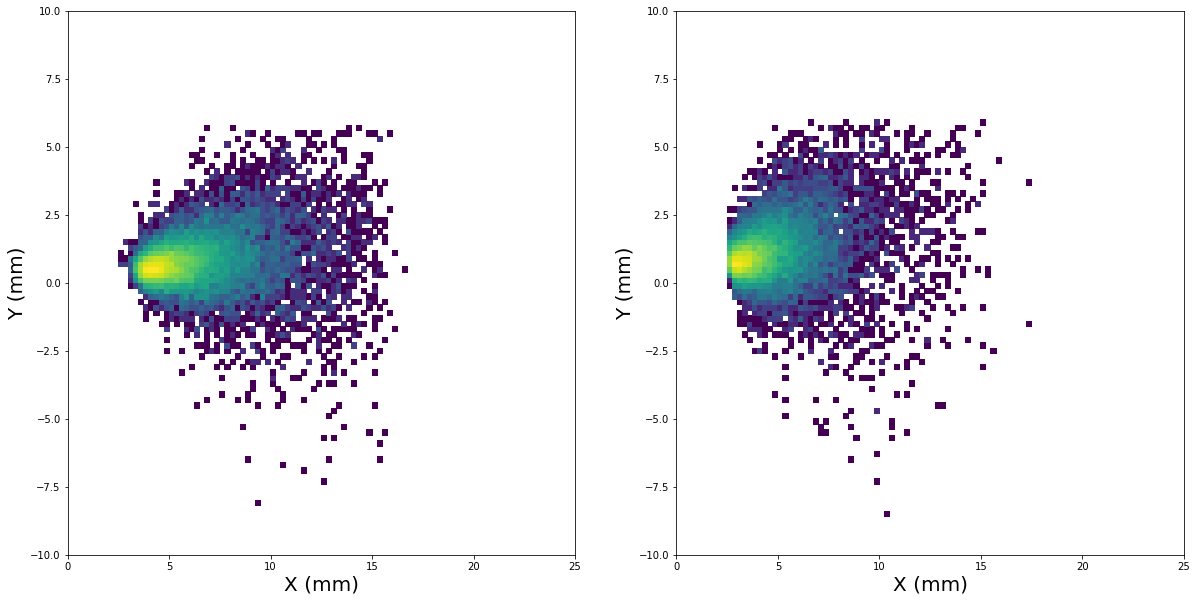

In [10]:
msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )

msk1 = None
msk2 = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df_signal[ "TrackX1" ][ msk1 ], df_signal[ "TrackY1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df_signal[ "TrackX1" ][ msk2 ], df_signal[ "TrackY1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

16514 15465


/home/antoniovilela/workspace/envs/tf-gpu-py37/lib64/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/antoniovilela/workspace/envs/tf-gpu-py37/lib64/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


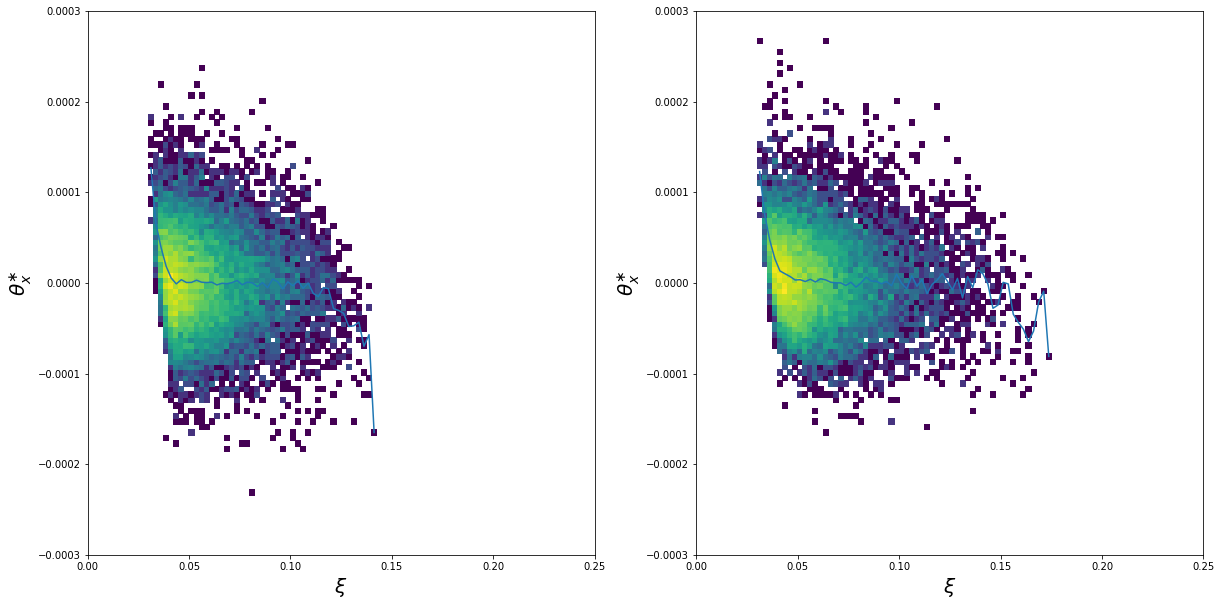

In [11]:
if proton_selection == "MultiRP":
    msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
    # Multi-RP
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

    print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_signal[ "Xi" ][ msk1 ], df_signal[ "ThX" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_signal[ "Xi" ][ msk2 ], df_signal[ "ThX" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

16514 15465


(0.0, 0.15)

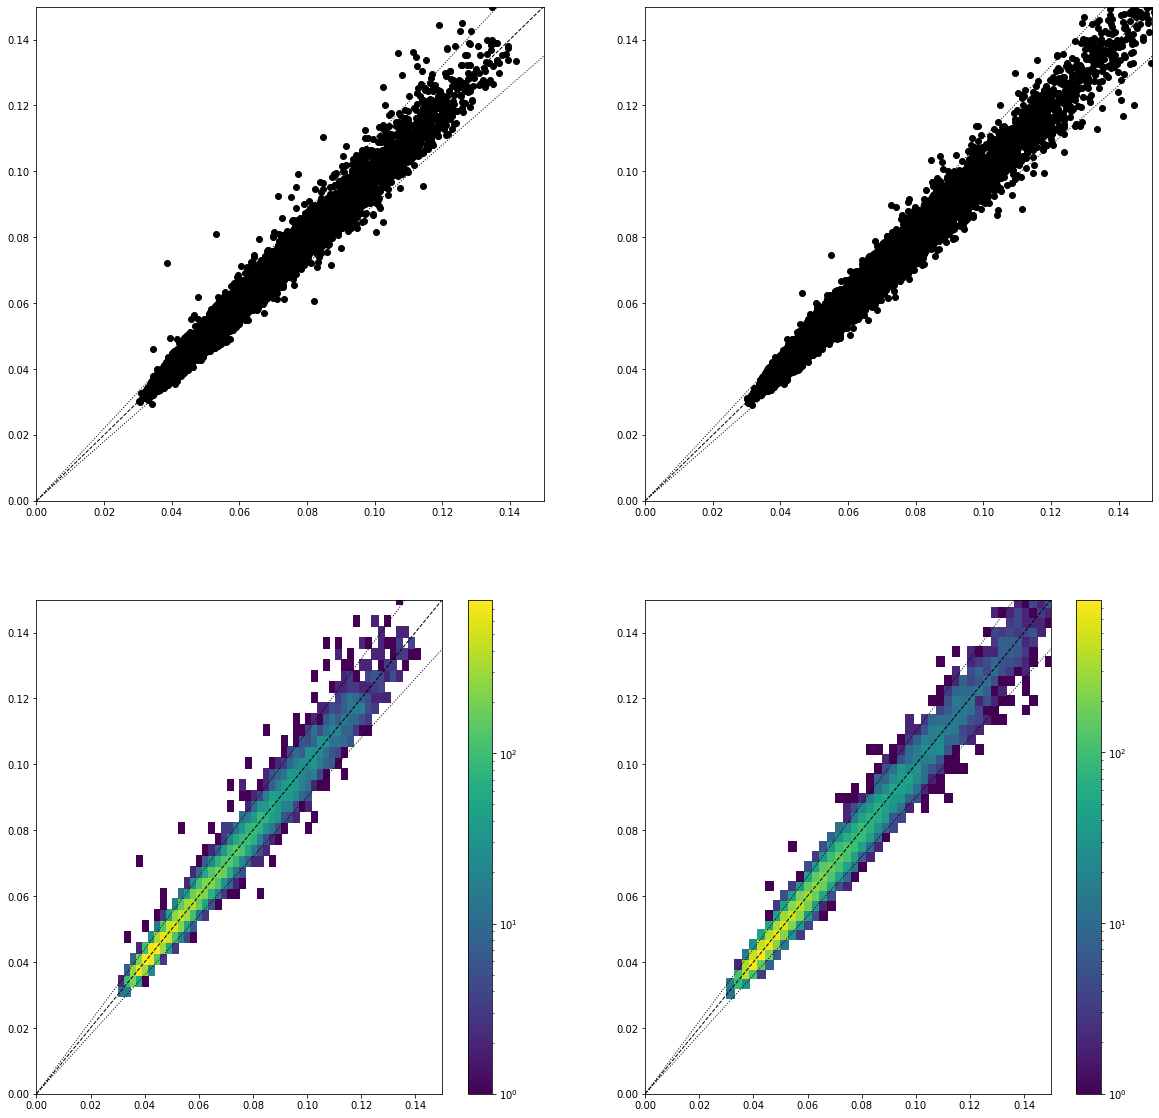

In [12]:
msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )
#msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 0 )

#msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
#msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
#msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

msk1 = None
msk2 = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 23 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 0) & ( df_signal["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
    msk2 = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

print ( len(df_signal[ "Xi" ][ msk1 ]), len(df_signal[ "Xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_signal[ "Xi" ][ msk1 ], df_signal[ "XiMuMuPlus" ][ msk1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_signal[ "Xi" ][ msk2 ], df_signal[ "XiMuMuMinus" ][ msk2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        3.030e+03, 1.239e+04, 4.200e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([-5.  , -4.84, -4.68, -4.52, -4.36, -4.2 , -4.04, -3.88, -3.72,
        -3.56, -3.4 , -3.24, -3.08, -2.92, -2.76, -2.6 , -2.44, -2.28,
        -2.12, -1.96, -1.8 , -1.64, -1.48, -1.32, -1.16, -1.  , -0.84,
        -0.68, -0.52, -0.36, -0.2 , -0.04,  0.12,  0.28,  0.44,  0.6 ,
         0.76,  0.92,  1.08,  1.24,  1.4 ,  1.56,  1.72,  1.88,  2.04,
         2.2 ,  2.36,

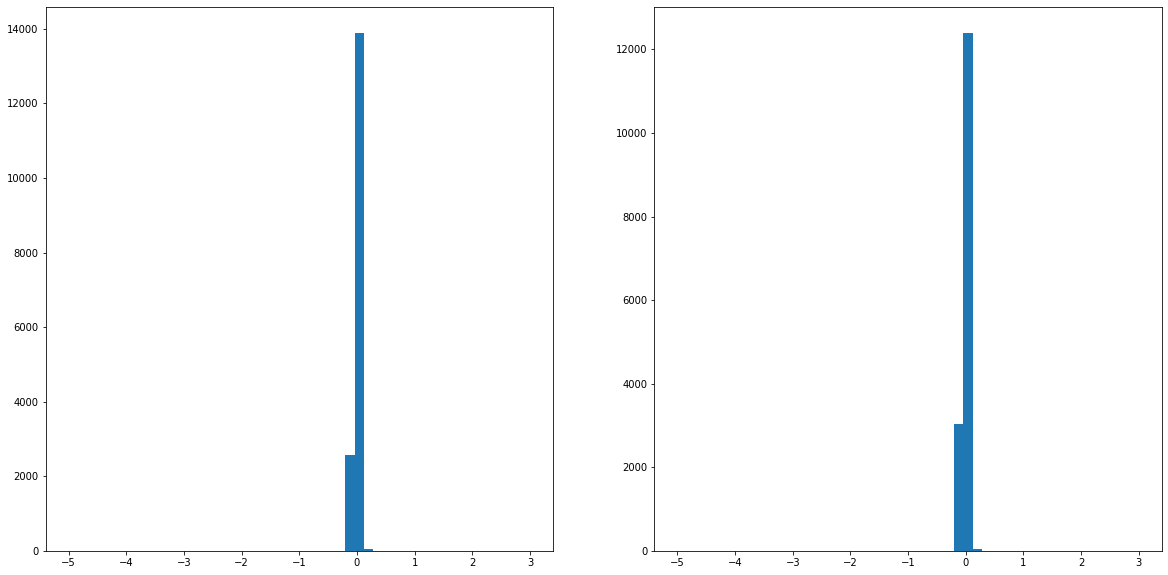

In [13]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist( ( 1. - df_signal[ "Xi" ][ msk1 ] / df_signal[ "XiMuMuPlus" ][ msk1 ] ), bins=50, range=(-5.,3.) )
axes[1].hist( ( 1. - df_signal[ "Xi" ][ msk2 ] / df_signal[ "XiMuMuMinus" ][ msk2 ] ), bins=50, range=(-5.,3.) )

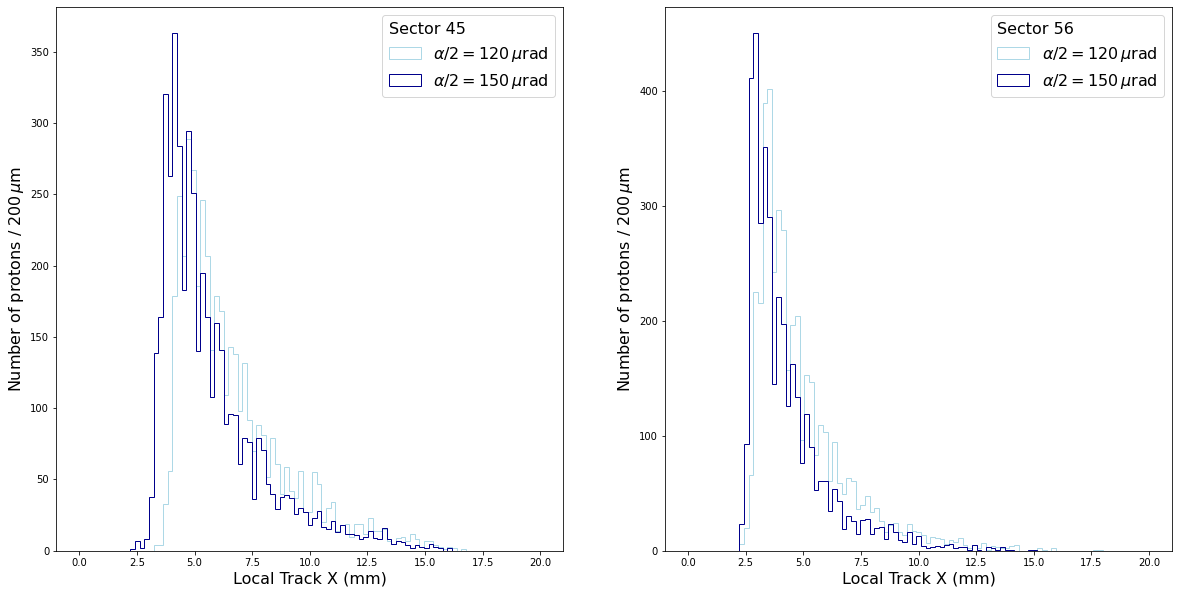

In [14]:
var_ = "TrackX2"

msk1_xangle1  = msk1 & ( df_signal[ "CrossingAngle" ] == 120 )
msk1_xangle2  = msk1 & ( df_signal[ "CrossingAngle" ] == 150 )
msk2_xangle1  = msk2 & ( df_signal[ "CrossingAngle" ] == 120 )
msk2_xangle2  = msk2 & ( df_signal[ "CrossingAngle" ] == 150 )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist( df_signal[ var_ ][ msk1_xangle1 ], histtype="step", color="lightblue", bins=np.linspace( 0., 20., int(20./0.2) ), label=r"$\alpha/2=120\,\mu\rm{rad}$" )
axes[0].hist( df_signal[ var_ ][ msk1_xangle2 ], histtype="step", color="darkblue", bins=np.linspace( 0., 20., int(20./0.2) ), label=r"$\alpha/2=150\,\mu\rm{rad}$" )
axes[1].hist( df_signal[ var_ ][ msk2_xangle1 ], histtype="step", color="lightblue", bins=np.linspace( 0., 20., int(20./0.2) ), label=r"$\alpha/2=120\,\mu\rm{rad}$" )
axes[1].hist( df_signal[ var_ ][ msk2_xangle2 ], histtype="step", color="darkblue", bins=np.linspace (0., 20, int(20./0.2) ), label=r"$\alpha/2=150\,\mu\rm{rad}$" )
axes[0].set_xlabel( "Local Track X (mm)", fontsize=16 )
axes[0].set_ylabel( "Number of protons / " + r"$200\,\mu\rm{m}$", fontsize=16 )
leg_ = axes[0].legend( fontsize=16 )
leg_.set_title( "Sector 45", prop={'size': 16} )
leg_._legend_box.align = "left"
axes[1].set_xlabel( "Local Track X (mm)", fontsize=16 )
axes[1].set_ylabel( "Number of protons / " + r"$200\,\mu\rm{m}$", fontsize=16 )
leg_ = axes[1].legend( fontsize=16 )
leg_.set_title( "Sector 56", prop={'size': 16} )
leg_._legend_box.align = "left"
#plt.savefig( "LocalTrack_X_vs_xangle.pdf" )

# Data

In [15]:
df_data_list = []
df_counts_data_list = []

#resample_factor = 1
#resample_factor = 20

#with h5py.File('output/output-UL2017B-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017B-Excl.h5', 'r') as f:    
#with h5py.File('output/output-UL2017C1-PreSel.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-Excl.h5', 'r') as f:

#fileNames = [
#    'output-UL2017B-PreSel.h5'
#]

fileNames = [
   'output/output-UL2017B-PreSel.h5',
   'output/output-UL2017C1-PreSel.h5',
   'output/output-UL2017E-PreSel.h5',
   'output/output-UL2017F1-PreSel.h5'
]

#fileNames = [
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_0.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_1.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_2.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_3.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20_4.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20.h5'
#]

for file_ in fileNames:
    with h5py.File( file_, 'r' ) as f:
        print ( f )
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )  
        
        dset_counts = f['event_counts']
        df_counts_data_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_data_list[-1] )
        
        chunk_size = 500000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_data_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
            print ( df_data_list[-1].head() )
            print ( len( df_data_list[-1] ) )
        

<HDF5 file "output-UL2017B-PreSel.h5" (mode r)>
['columns', 'event_counts', 'protons', 'selections']
(107075, 43)
[[2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 ...
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track

OSError: Unable to open file (unable to open file: name = 'output/output-UL2017E-PreSel.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [16]:
df_counts_data = df_counts_data_list[0];
for idx in range( 1, len(df_counts_data_list) ):
    df_counts_data = df_counts_data.add( df_counts_data_list[idx] )
df_counts_data

All        15991030
Muon         167713
Vertex       156078
Protons      116337
dtype: int64

In [17]:
df_data = pd.concat( df_data_list )

In [18]:
#msk_invmass = ( df_data["InvMass"] >= 110. )
#df_data = df_data[msk_invmass]
df_data

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,Muon1Eta,Muon1Phi,Muon1VtxZ,nVertices,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,297227.0,53.0,2297.0,36577200.0,0.0,120.0,0.0,-999.0,123.0,-1.0,...,1.228711,-2.968801,7.642523,13.0,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
1,297227.0,55.0,867.0,38079656.0,0.0,120.0,0.0,-999.0,103.0,-1.0,...,-1.693658,-0.273957,-0.406477,9.0,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
2,297227.0,55.0,867.0,38079656.0,0.0,120.0,0.0,-999.0,123.0,-1.0,...,-1.693658,-0.273957,-0.406477,9.0,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
3,297227.0,55.0,867.0,38079656.0,0.0,120.0,1.0,1.0,103.0,123.0,...,-1.693658,-0.273957,-0.406477,9.0,-0.412115,123.616516,27.0,0.132612,0.001953,0.048346
4,297227.0,56.0,1102.0,38791640.0,0.0,120.0,0.0,-999.0,103.0,-1.0,...,-1.087328,-0.051032,-1.935442,15.0,-1.928177,152.786011,29.0,0.058782,0.002211,0.062855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293521,300560.0,41.0,2170.0,49256896.0,0.0,130.0,0.0,-999.0,123.0,-1.0,...,0.868734,-0.099850,4.373901,29.0,4.375823,95.149643,51.0,0.778301,0.052643,0.003576
293522,300560.0,41.0,2170.0,49256896.0,0.0,130.0,1.0,1.0,103.0,123.0,...,0.868734,-0.099850,4.373901,29.0,4.375823,95.149643,51.0,0.778301,0.052643,0.003576
293523,300560.0,41.0,2202.0,49249952.0,0.0,130.0,0.0,-999.0,103.0,-1.0,...,-0.048654,-2.528477,-0.117575,18.0,-0.118303,141.193130,41.0,0.008181,0.006170,0.019201
293524,300560.0,41.0,2202.0,49249952.0,0.0,130.0,0.0,-999.0,123.0,-1.0,...,-0.048654,-2.528477,-0.117575,18.0,-0.118303,141.193130,41.0,0.008181,0.006170,0.019201


In [19]:
df_data_events = df_data.set_index( ["Run", "LumiSection", "EventNum", "Slice"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
df_data_events = df_data_events[ ~df_data_events.index.duplicated(keep='first') ]
#msk_invmass = ( df_data_events["InvMass"] >= 110. )
#df_data_events = df_data_events[msk_invmass]
print ( len( df_data_events ) )

116334


(array([4056., 3803., 3411., 3097., 2821., 2532., 2346., 2049., 1886.,
        1685., 1580., 1487., 1232., 1250., 1080., 1006.,  928.,  898.,
         799.,  772.,  748.,  693.,  658.,  620.,  577.,  585.,  555.,
         477.,  490.,  443.,  464.,  386.,  407.,  414.,  363.,  339.,
         329.,  344.,  330.,  323.,  311.,  292.,  282.,  251.,  272.,
         249.,  271.,  263.,  234.,  252.]),
 array([0.   , 0.004, 0.008, 0.012, 0.016, 0.02 , 0.024, 0.028, 0.032,
        0.036, 0.04 , 0.044, 0.048, 0.052, 0.056, 0.06 , 0.064, 0.068,
        0.072, 0.076, 0.08 , 0.084, 0.088, 0.092, 0.096, 0.1  , 0.104,
        0.108, 0.112, 0.116, 0.12 , 0.124, 0.128, 0.132, 0.136, 0.14 ,
        0.144, 0.148, 0.152, 0.156, 0.16 , 0.164, 0.168, 0.172, 0.176,
        0.18 , 0.184, 0.188, 0.192, 0.196, 0.2  ], dtype=float32),
 <BarContainer object of 50 artists>)

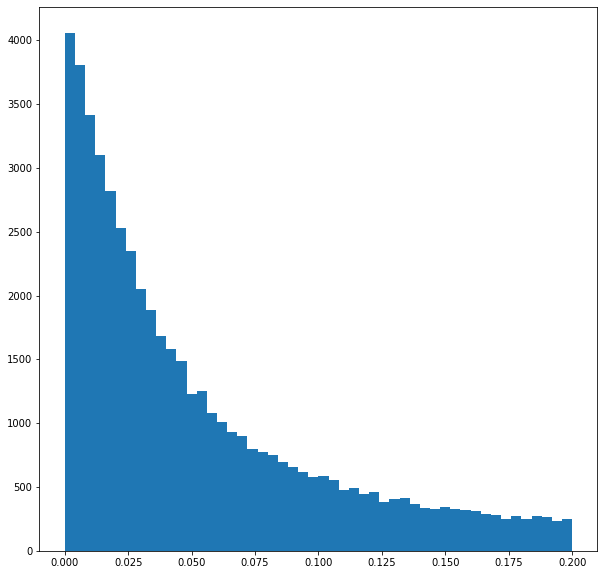

In [20]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.yscale( "log" )

(array([ 156.,  148.,  198.,  279.,  328.,  390.,  470.,  542.,  643.,
         675.,  777.,  865.,  913.,  992., 1120., 1223., 1309., 1370.,
        1421., 1548., 1499., 1676., 1649., 1787., 1845., 1922., 1911.,
        2026., 2031., 4140.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.], dtype=float32),
 <BarContainer object of 30 artists>)

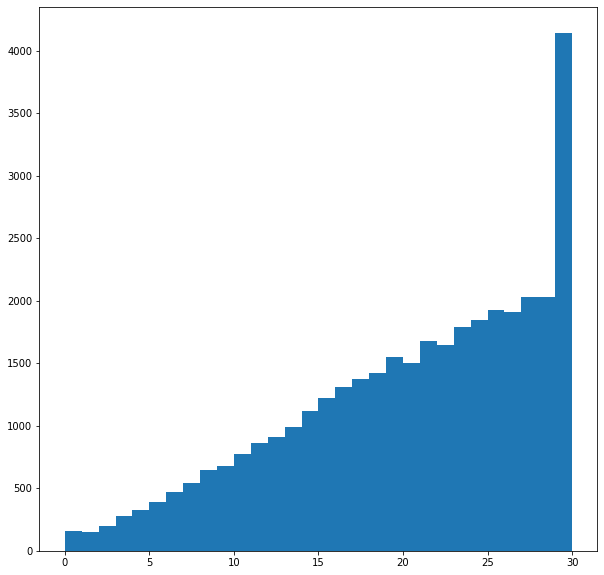

In [21]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.yscale( "log" )

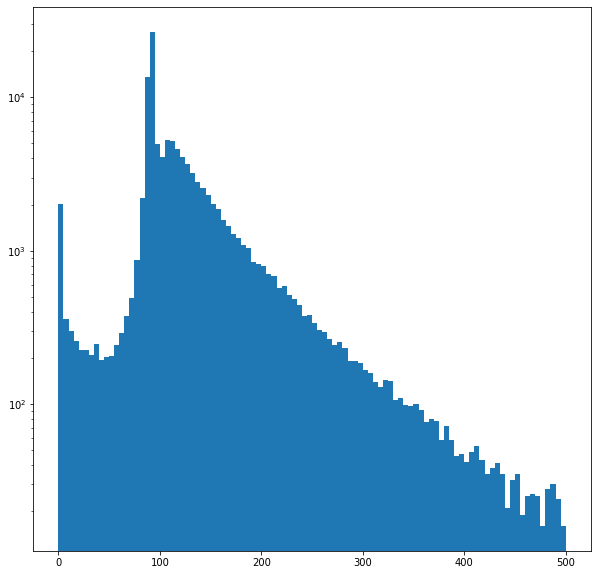

In [22]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500.) )
#plt.hist( df_data_events["InvMass"], bins=100, range=(70.,110.) )
plt.yscale( "log" )

36 38


Text(0, 0.5, 'Y (mm)')

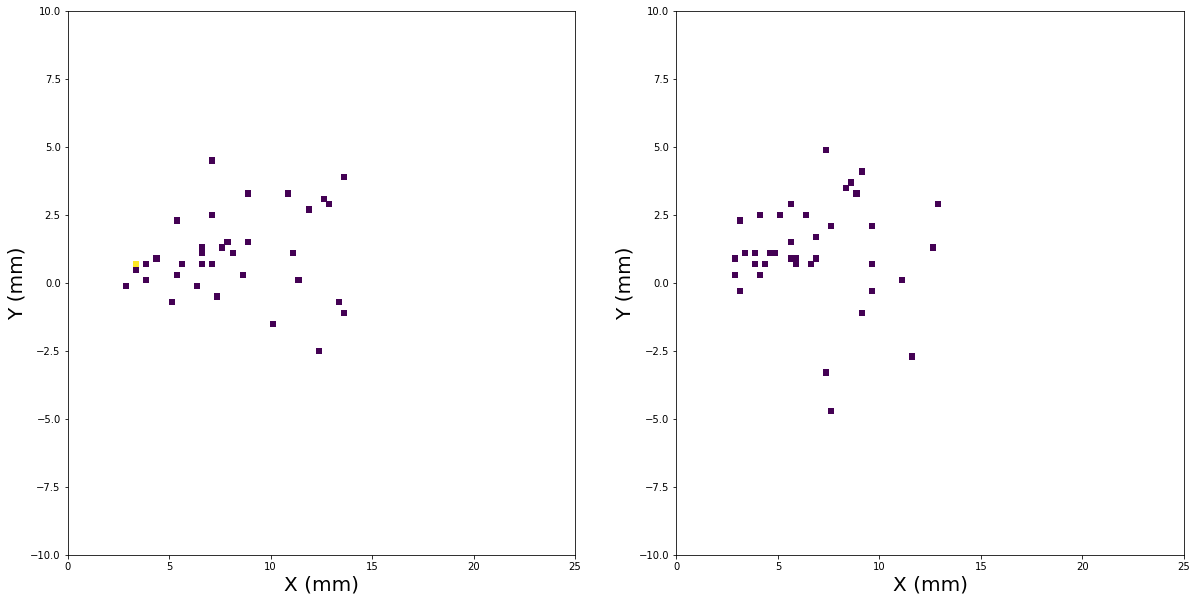

In [23]:
msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
#msk_excl_data = ( df_data["InvMass"] >= 0. )

msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 23 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df_data[ "TrackX1" ][ msk1_data ], df_data[ "TrackY1" ][ msk1_data ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df_data[ "TrackX1" ][ msk2_data ], df_data[ "TrackY1" ][ msk2_data ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

36452 37329


/home/antoniovilela/workspace/envs/tf-gpu-py37/lib64/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/antoniovilela/workspace/envs/tf-gpu-py37/lib64/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


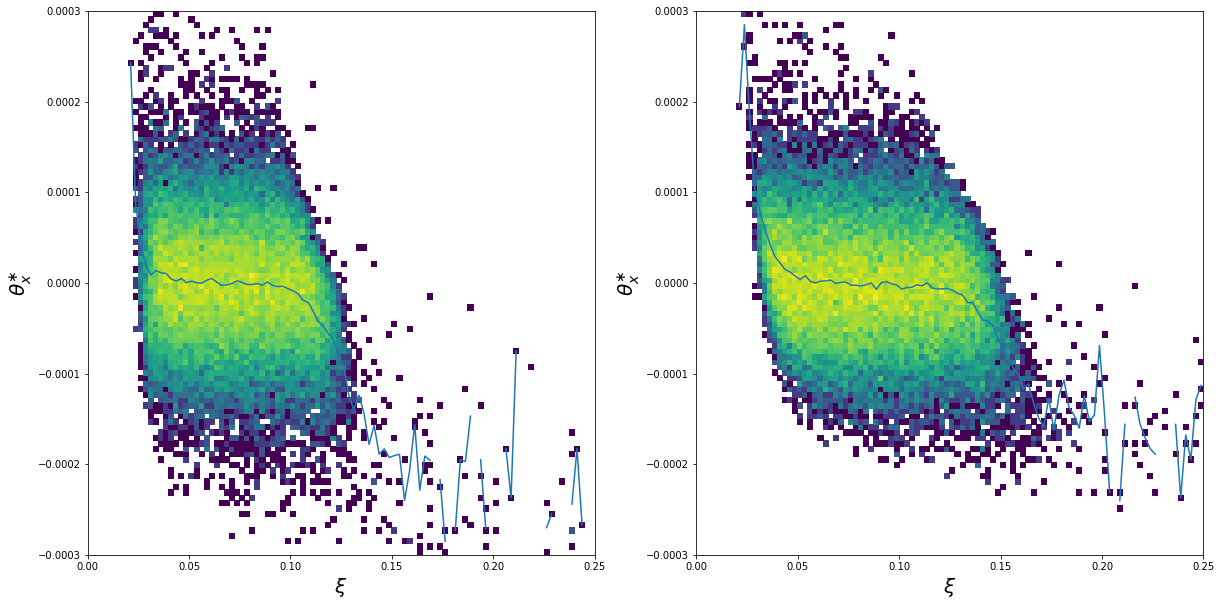

In [24]:
if proton_selection == "MultiRP":
    #msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
    msk_excl_data = ( df_data["InvMass"] >= 0. )
    # Multi-RP
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

    print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_data[ "Xi" ][ msk1_data ], df_data[ "ThX" ][ msk1_data ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_data[ "Xi" ][ msk2_data ], df_data[ "ThX" ][ msk2_data ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

36 38


(0.0, 0.15)

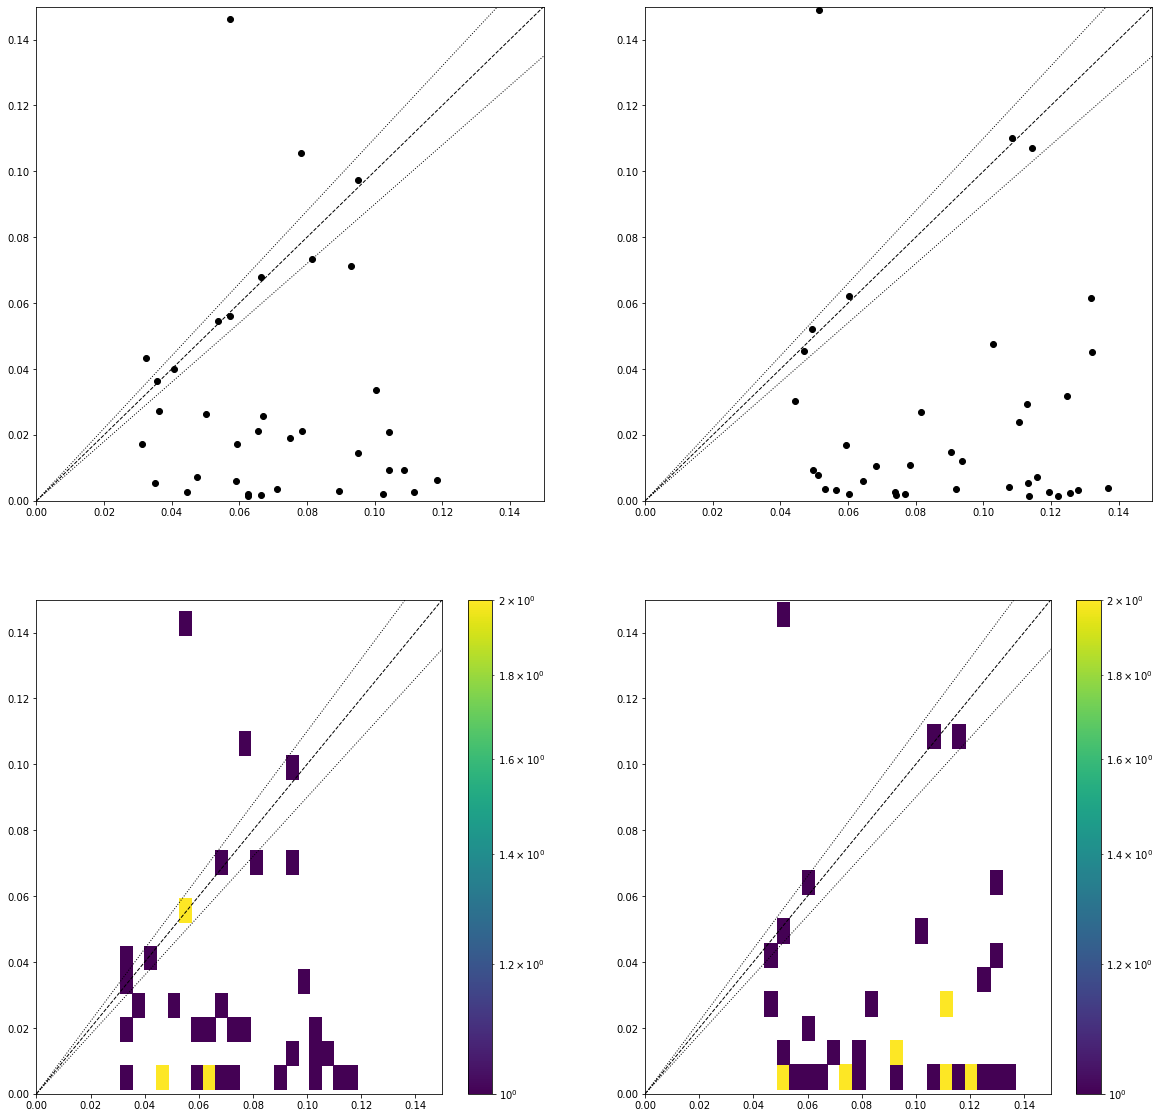

In [25]:
#np.random.seed( 42 )

msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )
#msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 0 )
#msk_excl_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] > 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )

#msk1 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 23 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 0 ) & ( df_data["RPId1"] == 123 )
#msk1 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
#msk2 = msk_excl & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 23 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    msk2_data = msk_excl_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_data[ "Xi" ][ msk1_data ], df_data[ "XiMuMuPlus" ][ msk1_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_data[ "Xi" ][ msk2_data ], df_data[ "XiMuMuMinus" ][ msk2_data ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

In [28]:
df_bkg_list = []
df_counts_bkg_list = []

resample_factor = 20

#with h5py.File('output/output-UL2017B-PreSel-Rnd-Res20.h5', 'r') as f:
#with h5py.File('output/output-UL2017C1-PreSel-Rnd-Res20.h5', 'r') as f:    

fileNames_bkg = [
    'output/output-UL2017B-PreSel-Rnd-Res20.h5',
    'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_0.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_1.h5',
    'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
]
#fileNames_bkg = [
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017B-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
#    'output/output-UL2017C1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_3.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_4.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_5.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_6.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_7.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_8.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_9.h5',
#    'output/output-UL2017E-PreSel-Pt1_30-Pt2_20-Rnd-Res20_10.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_0.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_1.h5',
#    'output/output-UL2017F1-PreSel-Pt1_30-Pt2_20-Rnd-Res20_2.h5'
#]

for file_ in fileNames_bkg:
    with h5py.File( file_, 'r' ) as f:
        print ( file_ )    
        print ( list(f.keys()) )
        dset = f['protons']
        print ( dset.shape )
        print ( dset[:,:] )
        
        dset_columns = f['columns']
        print ( dset_columns.shape )
        columns = list( dset_columns )
        print ( columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        print ( columns_str )

        dset_selections = f['selections']
        selections_ = [ item.decode("utf-8") for item in dset_selections ]
        print ( selections_ )
        
        dset_counts = f['event_counts']
        df_counts_bkg_list.append( pd.Series( dset_counts, index=selections_ ) )
        print ( df_counts_bkg_list[-1] )
       
        #chunk_size = 500000
        chunk_size = 100000
        entries = dset.shape[0]
        start_ = list( range( 0, entries, chunk_size ) )
        stop_ = start_[1:]
        stop_.append( entries )
        print ( start_ )
        print ( stop_ )
        for idx in range( len( start_ ) ):
            print ( start_[idx], stop_[idx] )
            #print ( dset[ start_[idx] : stop_[idx] ] )
            df_bkg_list.append( pd.DataFrame( dset[ start_[idx] : stop_[idx] ], columns=columns_str ) )
            print ( df_bkg_list[-1].head() )
            print ( len( df_bkg_list[-1] ) )
    

output/output-UL2017B-PreSel-Rnd-Res20.h5
['columns', 'event_counts', 'protons', 'selections']
(2141500, 43)
[[2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 ...
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  297050.0        715.0  1946.0  837794624.0   18.0          140.0      0.0   
1  297050.0        715.0  1946.0  837794624.0   18.0          140.0      0.0   
2  297050.0        715.0  1946.0  837794624.0   18.0          140.0      0.0   
3  297050.0        715.0  1946.0  837794624.0   18.0          140.0      1.0   
4  297050.0        715.0  1946.0  837794624.0   18.0          140.0      1.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ... -0.189801 -0.584516  -1.272301       18.0   
1 -999.0  103.0   -1.0  ... -0.189801 -0.584516  -1.272301       18.0   
2 -999.0  123.0   -1.0  ... -0.189801 -0.584516  -1.272301       18.0   
3    0.0    3.0   23.0  ... -0.189801 -0.584516  -1.272301       18.0   
4    1.0  103.0  123.0  ... -0.189801 -0.584516  -1.272301       18.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  297292.0        339.0  2144.0  605397632.0    4.0          140.0      0.0   
1  297292.0        341.0  1855.0  609553024.0    4.0          140.0      0.0   
2  297292.0        341.0   295.0  609305152.0    4.0          140.0      0.0   
3  297292.0        341.0   377.0  609727040.0    4.0          140.0      0.0   
4  297292.0        341.0   377.0  609727040.0    4.0          140.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ... -0.177831  2.893510   2.012637       21.0   
1 -999.0    3.0   -1.0  ... -0.333692 -1.080903  -1.062740       44.0   
2 -999.0  103.0   -1.0  ... -0.369565  2.213287   1.690711       25.0   
3 -999.0  103.0   -1.0  ...  1.529069  1.336144   1.401906       27.0   
4 -999.0  123.0   -1.0  ...  1.529069  1.336144   1.401906       27.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  299597.0        263.0  1603.0  286492832.0    0.0          120.0      0.0   
1  299597.0        263.0  1603.0  286492832.0    0.0          120.0      0.0   
2  299597.0        263.0  1603.0  286492832.0    0.0          120.0      0.0   
3  299597.0        263.0  1603.0  286492832.0    0.0          120.0      0.0   
4  299597.0        263.0  1603.0  286492832.0    0.0          120.0      1.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0    3.0   -1.0  ...  1.634664  2.521397   5.933403       10.0   
1 -999.0   23.0   -1.0  ...  1.634664  2.521397   5.933403       10.0   
2 -999.0  103.0   -1.0  ...  1.634664  2.521397   5.933403       10.0   
3 -999.0  123.0   -1.0  ...  1.634664  2.521397   5.933403       10.0   
4    0.0    3.0   23.0  ...  1.634664  2.521397   5.933403       10.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  300122.0        672.0  1984.0  938039808.0    9.0          130.0      0.0   
1  300122.0        672.0  1984.0  938039808.0    9.0          130.0      0.0   
2  300122.0        672.0  1984.0  938039808.0    9.0          130.0      0.0   
3  300122.0        672.0  1984.0  938039808.0    9.0          130.0      0.0   
4  300122.0        673.0  2997.0  939888064.0    9.0          130.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  2.355492 -0.320007   1.597233       39.0   
1 -999.0  123.0   -1.0  ...  2.355492 -0.320007   1.597233       39.0   
2 -999.0  123.0   -1.0  ...  2.355492 -0.320007   1.597233       39.0   
3 -999.0  123.0   -1.0  ...  2.355492 -0.320007   1.597233       39.0   
4 -999.0   23.0   -1.0  ...  1.627574  1.292919  -2.272672       22.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection     BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  300517.0        466.0  827.0  551420480.0    0.0          120.0      0.0   
1  300517.0        466.0  827.0  551420480.0    0.0          120.0      0.0   
2  300517.0        466.0  827.0  551420480.0    0.0          120.0      0.0   
3  300517.0        466.0  827.0  551420480.0    0.0          120.0      0.0   
4  300517.0        466.0  827.0  551420480.0    0.0          120.0      1.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ...   1.54838 -1.073493  -0.447105       26.0   
1 -999.0   23.0   -1.0  ...   1.54838 -1.073493  -0.447105       26.0   
2 -999.0  103.0   -1.0  ...   1.54838 -1.073493  -0.447105       26.0   
3 -999.0  123.0   -1.0  ...   1.54838 -1.073493  -0.447105       26.0   
4    1.0  103.0  123.0  ...   1.54838 -1.073493  -0.447105       26.0   

   PrimVertexZ   InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0    -0.44

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  300558.0        489.0  3265.0  683015360.0   16.0          130.0      0.0   
1  300558.0        489.0  3265.0  683015360.0   16.0          130.0      0.0   
2  300558.0        489.0  3265.0  683015360.0   16.0          130.0      1.0   
3  300558.0        489.0  3265.0  683015360.0   16.0          130.0      1.0   
4  300558.0        489.0  3107.0  682440064.0   16.0          130.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ... -0.763604  2.403392  -1.729528       26.0   
1 -999.0  123.0   -1.0  ... -0.763604  2.403392  -1.729528       26.0   
2    0.0    3.0   23.0  ... -0.763604  2.403392  -1.729528       26.0   
3    1.0  103.0  123.0  ... -0.763604  2.403392  -1.729528       26.0   
4 -999.0   23.0   -1.0  ...  0.165872  3.117710   1.967047       20.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  299593.0        450.0   492.0  561493184.0    8.0          140.0      1.0   
1  299593.0        450.0  2050.0  561210048.0    8.0          140.0      0.0   
2  299593.0        450.0  2050.0  561210048.0    8.0          140.0      0.0   
3  299593.0        450.0  2050.0  561210048.0    8.0          140.0      1.0   
4  299593.0        450.0  1525.0  560657152.0    8.0          140.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0    1.0  103.0  123.0  ...  1.911387  0.038914   0.651851       25.0   
1 -999.0  103.0   -1.0  ... -1.197090  2.773280  -2.249437       17.0   
2 -999.0  123.0   -1.0  ... -1.197090  2.773280  -2.249437       17.0   
3    1.0  103.0  123.0  ... -1.197090  2.773280  -2.249437       17.0   
4 -999.0    3.0   -1.0  ...  1.028510  0.192714  -1.757016       29.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  300517.0        377.0  2987.0  452060096.0    4.0          120.0      1.0   
1  300517.0        377.0    71.0  452221280.0    4.0          120.0      0.0   
2  300517.0        377.0    71.0  452221280.0    4.0          120.0      0.0   
3  300517.0        377.0    71.0  452221280.0    4.0          120.0      1.0   
4  300517.0        377.0  3182.0  452600352.0    4.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0    0.0    3.0   23.0  ...  1.419739  0.603778  -5.117986       15.0   
1 -999.0    3.0   -1.0  ... -1.135860  0.985459  -2.401666       19.0   
2 -999.0   23.0   -1.0  ... -1.135860  0.985459  -2.401666       19.0   
3    0.0    3.0   23.0  ... -1.135860  0.985459  -2.401666       19.0   
4 -999.0  103.0   -1.0  ... -1.477913 -2.063379   3.661225       15.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  300514.0        132.0  2281.0  173272048.0    4.0          150.0      0.0   
1  300514.0        132.0  2281.0  173272048.0    4.0          150.0      0.0   
2  300514.0        132.0   535.0  174946752.0    4.0          150.0      0.0   
3  300514.0        132.0   535.0  174946752.0    4.0          150.0      0.0   
4  300514.0        132.0   535.0  174946752.0    4.0          150.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  0.809600 -2.478558  -9.268685       24.0   
1 -999.0  123.0   -1.0  ...  0.809600 -2.478558  -9.268685       24.0   
2 -999.0   23.0   -1.0  ... -0.524908 -1.074448  -1.092675       26.0   
3 -999.0   23.0   -1.0  ... -0.524908 -1.074448  -1.092675       26.0   
4 -999.0   23.0   -1.0  ... -0.524908 -1.074448  -1.092675       26.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Muon0Pt', b'Muon0Eta', b'Muon0Phi', b'Muon0VtxZ', b'Muon1Pt', b'Muon1Eta', b'Muon1Phi', b'Muon1VtxZ', b'nVertices', b'PrimVertexZ', b'InvMass', b'ExtraPfCands', b'Acopl', b'XiMuMuPlus', b'XiMuMuMinus']
['Run', 'LumiSection', 'BX', 'EventNum', 'Slice', 'CrossingAngle', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2', 'Xi', 'T', 'ThX', 'ThY', 'Time', 'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP', 'TrackPixShift_SingleRP', 'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP', 

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304671.0       1177.0  2968.0  1.887466e+09   15.0          120.0      0.0   
1  304671.0       1177.0  2968.0  1.887466e+09   15.0          120.0      0.0   
2  304671.0       1177.0  2968.0  1.887466e+09   15.0          120.0      1.0   
3  304671.0       1177.0   128.0  1.887814e+09   15.0          120.0      0.0   
4  304671.0       1177.0   128.0  1.887814e+09   15.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ...  1.343373 -0.332421   0.169355       20.0   
1 -999.0  123.0   -1.0  ...  1.343373 -0.332421   0.169355       20.0   
2    1.0  103.0  123.0  ...  1.343373 -0.332421   0.169355       20.0   
3 -999.0    3.0   -1.0  ...  0.132496  0.496266  -2.466071       32.0   
4 -999.0  123.0   -1.0  ...  0.132496  0.496266  -2.466071       32.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  304625.0        232.0  3059.0  309258048.0    7.0          150.0      1.0   
1  304625.0        232.0  3059.0  309258048.0    7.0          150.0      1.0   
2  304797.0        311.0  1964.0  555936512.0    7.0          150.0      0.0   
3  304797.0        311.0  1964.0  555936512.0    7.0          150.0      0.0   
4  304797.0        311.0  1774.0  556514816.0    7.0          150.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0    0.0    3.0   23.0  ...  1.202031  1.735182  -1.396329       36.0   
1    1.0  103.0  123.0  ...  1.202031  1.735182  -1.396329       36.0   
2 -999.0  123.0   -1.0  ...  0.704110 -2.024904  -2.360023       38.0   
3 -999.0  123.0   -1.0  ...  0.704110 -2.024904  -2.360023       38.0   
4 -999.0   23.0   -1.0  ... -1.299923  0.346292   4.510416       65.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection     BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304144.0       2587.0  126.0  3.303180e+09   12.0          110.0      0.0   
1  304144.0       2587.0  126.0  3.303180e+09   12.0          110.0      0.0   
2  304144.0       2587.0  900.0  3.303181e+09   12.0          110.0      0.0   
3  304144.0       2587.0  900.0  3.303181e+09   12.0          110.0      0.0   
4  304144.0       2588.0  412.0  3.304016e+09   12.0          110.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ... -0.183627  0.712942   5.102710       13.0   
1 -999.0   23.0   -1.0  ... -0.183627  0.712942   5.102710       13.0   
2 -999.0   23.0   -1.0  ... -0.491636 -0.176976   6.771945       11.0   
3 -999.0  103.0   -1.0  ... -0.491636 -0.176976   6.771945       11.0   
4 -999.0   23.0   -1.0  ...  0.446606 -1.101882   1.165051       16.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304616.0        982.0   852.0  1.590483e+09    9.0          120.0      0.0   
1  304616.0        982.0   852.0  1.590483e+09    9.0          120.0      0.0   
2  304616.0        982.0   852.0  1.590483e+09    9.0          120.0      0.0   
3  304616.0        982.0  1649.0  1.590936e+09    9.0          120.0      0.0   
4  304616.0        982.0  1649.0  1.590936e+09    9.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ... -0.167361  2.974981  -0.991230       25.0   
1 -999.0  123.0   -1.0  ... -0.167361  2.974981  -0.991230       25.0   
2 -999.0  123.0   -1.0  ... -0.167361  2.974981  -0.991230       25.0   
3 -999.0  103.0   -1.0  ... -1.496058  0.006412   1.535596       26.0   
4 -999.0  123.0   -1.0  ... -1.496058  0.006412   1.535596       26.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304738.0       1082.0  1727.0  1.797606e+09   19.0          120.0      0.0   
1  304738.0       1082.0  1727.0  1.797606e+09   19.0          120.0      0.0   
2  304738.0       1082.0  1727.0  1.797606e+09   19.0          120.0      1.0   
3  304738.0       1082.0  2973.0  1.797749e+09   19.0          120.0      0.0   
4  304738.0       1082.0  2973.0  1.797749e+09   19.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ... -2.049066 -2.148825  -0.188303       30.0   
1 -999.0  123.0   -1.0  ... -2.049066 -2.148825  -0.188303       30.0   
2    1.0  103.0  123.0  ... -2.049066 -2.148825  -0.188303       30.0   
3 -999.0   23.0   -1.0  ... -0.957912  1.576725   0.210771       34.0   
4 -999.0   23.0   -1.0  ... -0.957912  1.576725   0.210771       34.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

[[3.0412500e+05 6.7300000e+02 7.8800000e+02 ... 2.8255475e-01
  3.5535751e-03 1.7850535e-02]
 [3.0412500e+05 6.7300000e+02 7.8800000e+02 ... 2.8255475e-01
  3.5535751e-03 1.7850535e-02]
 [3.0412500e+05 6.7300000e+02 7.8800000e+02 ... 2.8255475e-01
  3.5535751e-03 1.7850535e-02]
 ...
 [3.0388500e+05 9.0100000e+02 1.6790000e+03 ... 4.4969523e-01
  3.2551270e-02 2.2802711e-03]
 [3.0388500e+05 9.0100000e+02 1.6790000e+03 ... 4.4969523e-01
  3.2551270e-02 2.2802711e-03]
 [3.0388500e+05 9.0100000e+02 1.6790000e+03 ... 4.4969523e-01
  3.2551270e-02 2.2802711e-03]]
(43,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'TrackPixShift_SingleRP', b'Track1PixShift_MultiRP', b'Track2PixShift_MultiRP', b'Muon0Pt', b'Muon

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
1  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
2  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
3  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   
4  304209.0        325.0  2685.0  547607104.0   19.0          140.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
1 -999.0   23.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
2 -999.0  103.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
3 -999.0  123.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   
4 -999.0  123.0   -1.0  ...  1.520762 -2.756793  -2.318085       31.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  304169.0        295.0  2611.0  447821824.0    4.0          140.0      0.0   
1  304169.0        295.0  2611.0  447821824.0    4.0          140.0      0.0   
2  304169.0        295.0  2611.0  447821824.0    4.0          140.0      0.0   
3  304169.0        295.0  2611.0  447821824.0    4.0          140.0      1.0   
4  304169.0        295.0   385.0  447568288.0    4.0          140.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ... -1.258809  1.158213   1.263305       31.0   
1 -999.0  123.0   -1.0  ... -1.258809  1.158213   1.263305       31.0   
2 -999.0  123.0   -1.0  ... -1.258809  1.158213   1.263305       31.0   
3    1.0  103.0  123.0  ... -1.258809  1.158213   1.263305       31.0   
4 -999.0  123.0   -1.0  ...  1.224584 -2.301029  -4.130117       36.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0  

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304333.0       1523.0  1403.0  2.236326e+09    5.0          120.0      0.0   
1  304333.0       1523.0  1403.0  2.236326e+09    5.0          120.0      0.0   
2  304333.0       1524.0   445.0  2.236839e+09    5.0          120.0      0.0   
3  304333.0       1524.0   445.0  2.236839e+09    5.0          120.0      0.0   
4  304333.0       1524.0   445.0  2.236839e+09    5.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  0.530590 -2.062698   2.609104       19.0   
1 -999.0  123.0   -1.0  ...  0.530590 -2.062698   2.609104       19.0   
2 -999.0   23.0   -1.0  ...  0.981842  1.128600   7.152431       20.0   
3 -999.0  123.0   -1.0  ...  0.981842  1.128600   7.152431       20.0   
4 -999.0  123.0   -1.0  ...  0.981842  1.128600   7.152431       20.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304797.0       1544.0  2093.0  2.468682e+09    7.0          120.0      0.0   
1  304797.0       1544.0  2093.0  2.468682e+09    7.0          120.0      0.0   
2  304797.0       1544.0  2093.0  2.468682e+09    7.0          120.0      1.0   
3  304797.0       1545.0  3439.0  2.469850e+09    7.0          120.0      0.0   
4  304797.0       1545.0  2091.0  2.469829e+09    7.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  0.479180  1.756531   1.443182       22.0   
1 -999.0  123.0   -1.0  ...  0.479180  1.756531   1.443182       22.0   
2    0.0    3.0   23.0  ...  0.479180  1.756531   1.443182       22.0   
3 -999.0   23.0   -1.0  ...  0.225333 -2.621816   3.716725       18.0   
4 -999.0  123.0   -1.0  ...  0.851718 -0.976745  -0.610405       21.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection     BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
1  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
2  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
3  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      0.0   
4  304738.0        724.0  386.0  1.249284e+09   19.0          130.0      1.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
1 -999.0   23.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
2 -999.0  103.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
3 -999.0  123.0   -1.0  ...  0.342149 -2.345681  -0.157936       52.0   
4    1.0  103.0  123.0  ...  0.342149 -2.345681  -0.157936       52.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection     BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
1  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
2  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
3  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      0.0   
4  304797.0       1419.0  302.0  2.330682e+09    1.0          120.0      1.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0   23.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
1 -999.0   23.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
2 -999.0  103.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
3 -999.0  123.0   -1.0  ... -1.420962  2.340286   5.354559       39.0   
4    1.0  103.0  123.0  ... -1.420962  2.340286   5.354559       39.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
1  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
2  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
3  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   
4  303885.0       1321.0  1553.0  1.719806e+09    2.0          130.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
1 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
2 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
3 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   
4 -999.0  123.0   -1.0  ...  0.759099  0.559623   2.150961       25.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  304778.0        705.0  2382.0  1.126206e+09    6.0          120.0      0.0   
1  304778.0        705.0  2382.0  1.126206e+09    6.0          120.0      0.0   
2  304778.0        705.0  2382.0  1.126206e+09    6.0          120.0      1.0   
3  304778.0        705.0  2267.0  1.126185e+09    6.0          120.0      0.0   
4  304778.0        705.0  2267.0  1.126185e+09    6.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ... -1.096211  2.265400  -0.900246       25.0   
1 -999.0  123.0   -1.0  ... -1.096211  2.265400  -0.900246       25.0   
2    1.0  103.0  123.0  ... -1.096211  2.265400  -0.900246       25.0   
3 -999.0  103.0   -1.0  ... -1.030907 -0.004996  -3.921212       31.0   
4 -999.0  123.0   -1.0  ... -1.030907 -0.004996  -3.921212       31.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  305064.0       1253.0  1652.0  1.682284e+09    4.0          120.0      0.0   
1  305064.0       1253.0  1652.0  1.682284e+09    4.0          120.0      0.0   
2  305064.0       1253.0  1652.0  1.682284e+09    4.0          120.0      1.0   
3  305064.0       1254.0  3126.0  1.683126e+09    4.0          120.0      0.0   
4  305064.0       1254.0  3126.0  1.683126e+09    4.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0    3.0   -1.0  ... -1.370069  2.899266   2.956842       24.0   
1 -999.0   23.0   -1.0  ... -1.370069  2.899266   2.956842       24.0   
2    0.0    3.0   23.0  ... -1.370069  2.899266   2.956842       24.0   
3 -999.0  123.0   -1.0  ... -1.042857  2.380677   2.882799       14.0   
4 -999.0  123.0   -1.0  ... -1.042857  2.380677   2.882799       14.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinu

        Run  LumiSection      BX      EventNum  Slice  CrossingAngle  MultiRP  \
0  305045.0        606.0  3139.0  1.002454e+09   18.0          120.0      0.0   
1  305045.0        606.0  3139.0  1.002454e+09   18.0          120.0      0.0   
2  305045.0        606.0  3139.0  1.002454e+09   18.0          120.0      1.0   
3  305045.0        607.0  1486.0  1.003828e+09   18.0          120.0      0.0   
4  305045.0        607.0  1486.0  1.003828e+09   18.0          120.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  103.0   -1.0  ...  1.407866  1.432250  -1.123343       25.0   
1 -999.0  123.0   -1.0  ...  1.407866  1.432250  -1.123343       25.0   
2    1.0  103.0  123.0  ...  1.407866  1.432250  -1.123343       25.0   
3 -999.0    3.0   -1.0  ...  0.669306  1.623108  -5.043192       36.0   
4 -999.0  103.0   -1.0  ...  0.669306  1.623108  -5.043192       36.0   

   PrimVertexZ    InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus

        Run  LumiSection      BX     EventNum  Slice  CrossingAngle  MultiRP  \
0  305081.0        397.0  2481.0  667072064.0   14.0          150.0      0.0   
1  305081.0        397.0  2481.0  667072064.0   14.0          150.0      0.0   
2  305081.0        397.0  2481.0  667072064.0   14.0          150.0      1.0   
3  305081.0        397.0  2498.0  666827904.0   14.0          150.0      0.0   
4  305081.0        397.0  2498.0  666827904.0   14.0          150.0      0.0   

     Arm  RPId1  RPId2  ...  Muon1Eta  Muon1Phi  Muon1VtxZ  nVertices  \
0 -999.0  123.0   -1.0  ...  1.444564 -0.228620  -1.379423       35.0   
1 -999.0  123.0   -1.0  ...  1.444564 -0.228620  -1.379423       35.0   
2    0.0    3.0   23.0  ...  1.444564 -0.228620  -1.379423       35.0   
3 -999.0  123.0   -1.0  ... -0.370961 -1.208631  -0.800980       37.0   
4 -999.0  123.0   -1.0  ... -0.370961 -1.208631  -0.800980       37.0   

   PrimVertexZ     InvMass  ExtraPfCands     Acopl  XiMuMuPlus  XiMuMuMinus  
0 

In [29]:
df_counts_bkg = df_counts_bkg_list[0]
for idx in range( 1, len( df_counts_bkg_list ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list[idx] )
df_counts_bkg

All           869119560
Muon            8456020
Vertex          7782360
ProtonsRnd      6301680
dtype: int64

In [30]:
df_bkg = pd.concat( df_bkg_list )

In [33]:
#msk_invmass = ( df_bkg["InvMass"] >= 110. )
#df_bkg = df_bkg[msk_invmass]
df_bkg

,Run,LumiSection,BX,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,...,Muon1Eta,Muon1Phi,Muon1VtxZ,nVertices,PrimVertexZ,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,297227.0,53.0,2297.0,36577200.0,0.0,120.0,0.0,-999.0,103.0,-1.0,...,1.228711,-2.968801,7.642523,13.0,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
1,297227.0,53.0,2297.0,36577200.0,0.0,120.0,0.0,-999.0,123.0,-1.0,...,1.228711,-2.968801,7.642523,13.0,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
2,297227.0,53.0,2297.0,36577200.0,0.0,120.0,1.0,1.0,103.0,123.0,...,1.228711,-2.968801,7.642523,13.0,7.640311,12.129827,48.0,0.983012,0.056195,0.004091
3,297227.0,55.0,1778.0,37547956.0,0.0,120.0,0.0,-999.0,23.0,-1.0,...,-1.328835,-2.660223,1.253821,15.0,1.257841,86.527367,21.0,0.609906,0.004207,0.022784
4,297227.0,55.0,1778.0,37547956.0,0.0,120.0,0.0,-999.0,23.0,-1.0,...,-1.328835,-2.660223,1.253821,15.0,1.257841,86.527367,21.0,0.609906,0.004207,0.022784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,305114.0,429.0,1022.0,454508800.0,19.0,120.0,1.0,1.0,103.0,123.0,...,-2.150826,1.951248,3.851655,27.0,3.858890,85.314529,34.0,0.621819,0.001235,0.115305
3796,305114.0,430.0,3287.0,455854208.0,19.0,120.0,0.0,-999.0,3.0,-1.0,...,2.405622,0.257360,-6.306211,21.0,-6.288290,87.766388,35.0,0.594402,0.078102,0.001349
3797,305114.0,430.0,3287.0,455854208.0,19.0,120.0,0.0,-999.0,23.0,-1.0,...,2.405622,0.257360,-6.306211,21.0,-6.288290,87.766388,35.0,0.594402,0.078102,0.001349
3798,305114.0,430.0,3287.0,455854208.0,19.0,120.0,0.0,-999.0,103.0,-1.0,...,2.405622,0.257360,-6.306211,21.0,-6.288290,87.766388,35.0,0.594402,0.078102,0.001349


In [34]:
#df_bkg_events = df_bkg.set_index( ["Run", "LumiSection", "EventNum"] ).drop( columns=['Xi', 'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2'] )
#df_bkg_events = df_bkg_events[ ~df_bkg_events.index.duplicated(keep='first') ]
#print ( len( df_bkg_events ) )

In [35]:
#fig = plt.figure( figsize=(10,10) )
#plt.hist( df_data_events["Acopl"], bins=50, range=(0.,0.2) )
#plt.hist( df_data_events["ExtraPfCands"], bins=30, range=(0.,30) )
#plt.hist( df_data_events["InvMass"], bins=100, range=(0.,500) )
#plt.yscale( "log" )

1065 1722


Text(0, 0.5, 'Y (mm)')

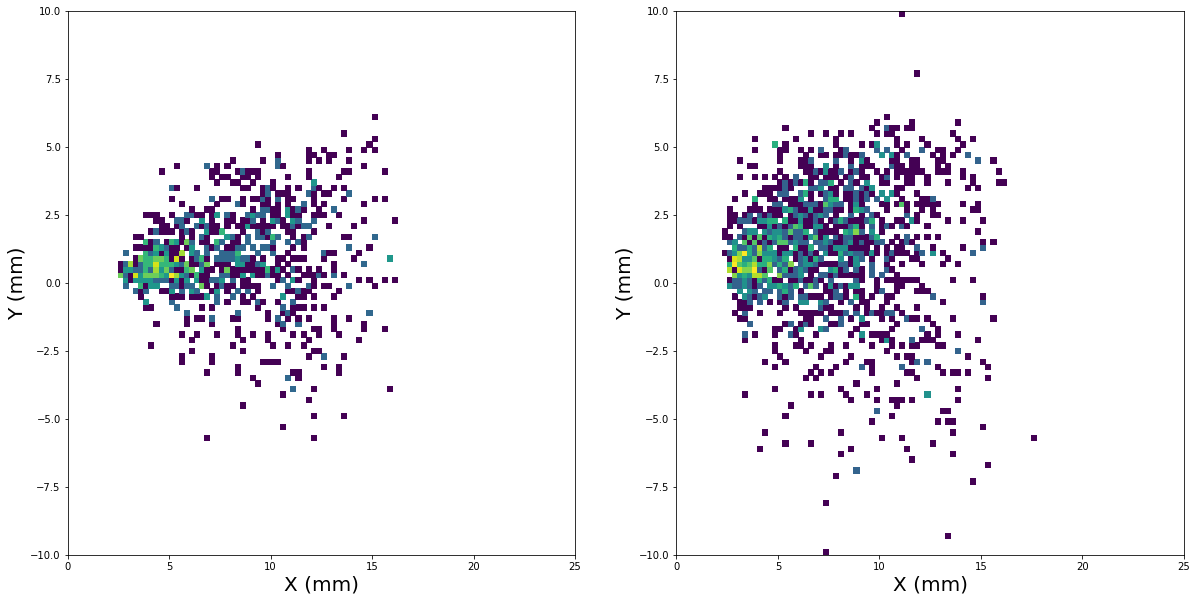

In [36]:
msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 0. )

msk1_bkg = None
msk2_bkg = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 23 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )

print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
axes[0].hist2d( df_bkg[ "TrackX1" ][ msk1_bkg ], df_bkg[ "TrackY1" ][ msk1_bkg ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0].set_xlabel( "X (mm)", fontsize=20 )
axes[0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1].hist2d( df_bkg[ "TrackX1" ][ msk2_bkg ], df_bkg[ "TrackY1" ][ msk2_bkg ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1].set_xlabel( "X (mm)", fontsize=20 )
axes[1].set_ylabel( "Y (mm)", fontsize=20 )

1096920 1846720


/home/antoniovilela/workspace/envs/tf-gpu-py37/lib64/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/home/antoniovilela/workspace/envs/tf-gpu-py37/lib64/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


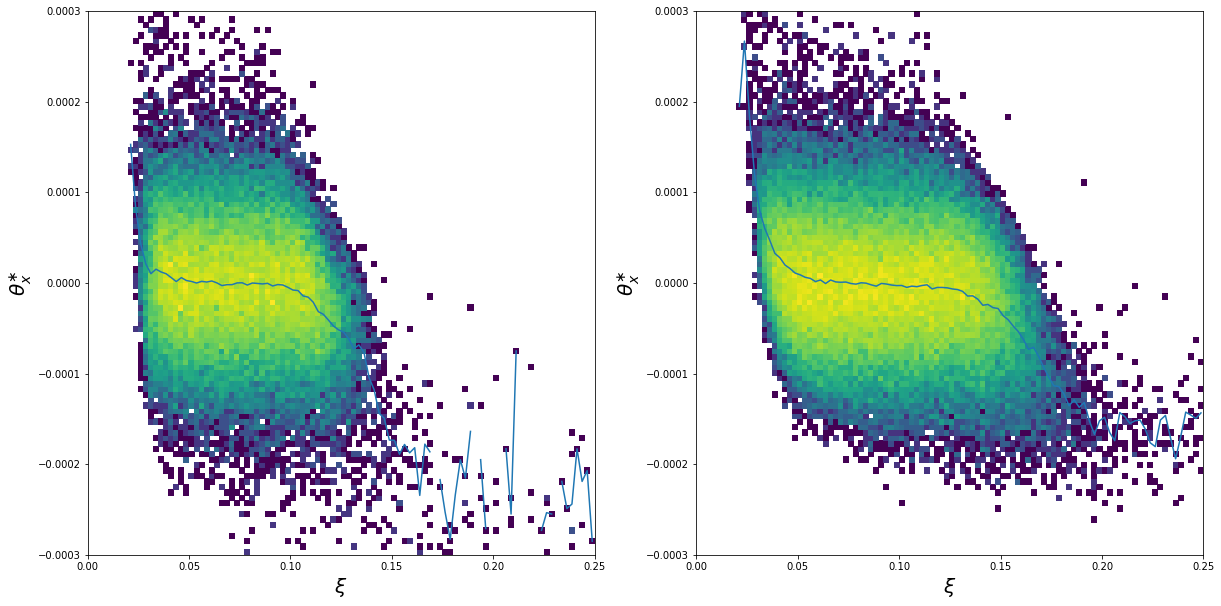

In [37]:
if proton_selection == "MultiRP":
    #msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
    msk_excl_bkg = ( df_bkg["InvMass"] >= 0. )
    # Multi-RP
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )

    print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "ThX" ][ msk1_bkg ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_bkg[ "Xi" ][ msk2_bkg], df_bkg[ "ThX" ][ msk2_bkg ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

1065 1722


(0.0, 0.15)

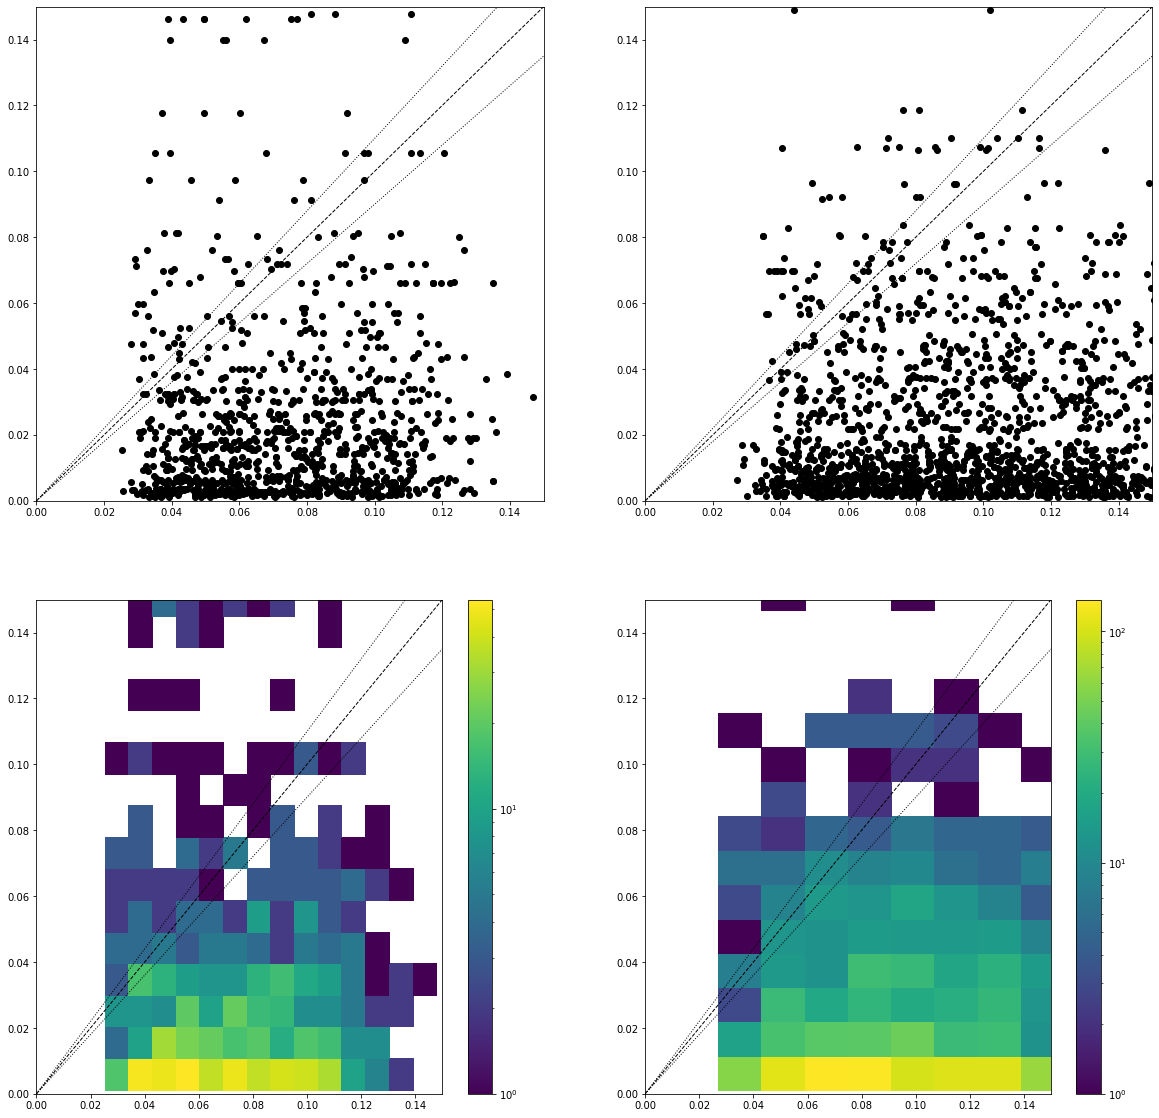

In [38]:
msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] <= 0.009 ) & ( df_bkg["ExtraPfCands"] <= 0 )
#msk_excl_bkg = ( df_bkg["InvMass"] >= 110. ) & ( df_bkg["Acopl"] > 0.009 ) & ( df_bkg["ExtraPfCands"] <= 1 )

msk1_bkg = None
msk2_bkg = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 23 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 0) & ( df_bkg["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    msk2_bkg = msk_excl_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )

print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,1].plot( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,0].hist2d( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "XiMuMuPlus" ][ msk1_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
counts, xedges, yedges, im = axes[1,1].hist2d( df_bkg[ "Xi" ][ msk2_bkg ], df_bkg[ "XiMuMuMinus" ][ msk2_bkg ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)

[0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 2 0 0 2 3 4 2 0 1 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
[0 0 0 1 0 0 0 1 0 0 2 0 1 0 1 1 0 0 0 2 0 0 1 0 2 3 0 0 1 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
y max. = 8.0


(0.0, 8.0)

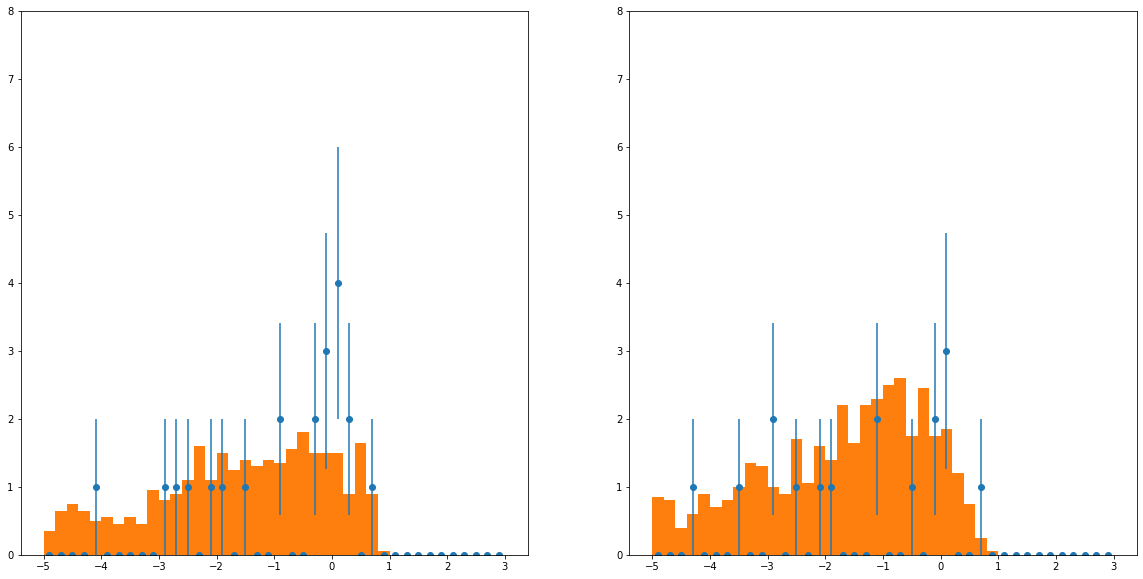

In [39]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

bins_ = 40
range_ = (-5.,3.)

#axes[0].hist( ( 1. - df_data[ "Xi" ][ msk1 ] / df_data[ "XiMuMuPlus" ][ msk1 ] ), bins=10, range=(-5.,3.), weights=weights_1 )
#axes[1].hist( ( 1. - df_data[ "Xi" ][ msk2 ] / df_data[ "XiMuMuMinus" ][ msk2 ] ), bins=10, range=(-5.,3.), weights=weights_2 )

vals_1 = ( 1. - df_data[ "Xi" ][ msk1_data ] / df_data[ "XiMuMuPlus" ][ msk1_data ] )
counts_1, bin_edges_1 = np.histogram( vals_1, bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
print ( counts_1, bin_edges_1 )

bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

vals_2 = ( 1. - df_data[ "Xi" ][ msk2_data ] / df_data[ "XiMuMuMinus" ][ msk2_data ] )
counts_2, bin_edges_2 = np.histogram( vals_2, bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
print ( counts_2, bin_edges_2 )

bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

weights_1 = None
if resample_factor > 1:
    weights_1 = np.full_like( df_bkg[ "Xi" ][ msk1_bkg ], ( 1./resample_factor ) )

vals_bkg_1 = ( 1. - df_bkg[ "Xi" ][ msk1_bkg ] / df_bkg[ "XiMuMuPlus" ][ msk1_bkg ] )
axes[0].hist( vals_bkg_1, bins=bins_, range=range_, weights=weights_1 )
axes[0].set_ylim( top=y_max )

weights_2 = None
if resample_factor > 1:
    weights_2 = np.full_like( df_bkg[ "Xi" ][ msk2_bkg ], ( 1./resample_factor ) )
    
vals_bkg_2 = ( 1. - df_bkg[ "Xi" ][ msk2_bkg ] / df_bkg[ "XiMuMuMinus" ][ msk2_bkg ] )
axes[1].hist( vals_bkg_2, bins=bins_, range=range_, weights=weights_2 )
axes[1].set_ylim( top=y_max )

5785     -1.711910e-05
39811     7.711315e-07
45170    -5.318766e-05
936       3.860024e-06
93817    -1.272517e-05
157144   -3.580272e-05
197500   -5.277169e-05
Name: ThY, dtype: float32
101961   -0.000036
47139     0.000098
102511    0.000096
183292    0.000053
254521   -0.000021
Name: ThY, dtype: float32
y max. = 9.47213595499958


(0.0, 9.47213595499958)

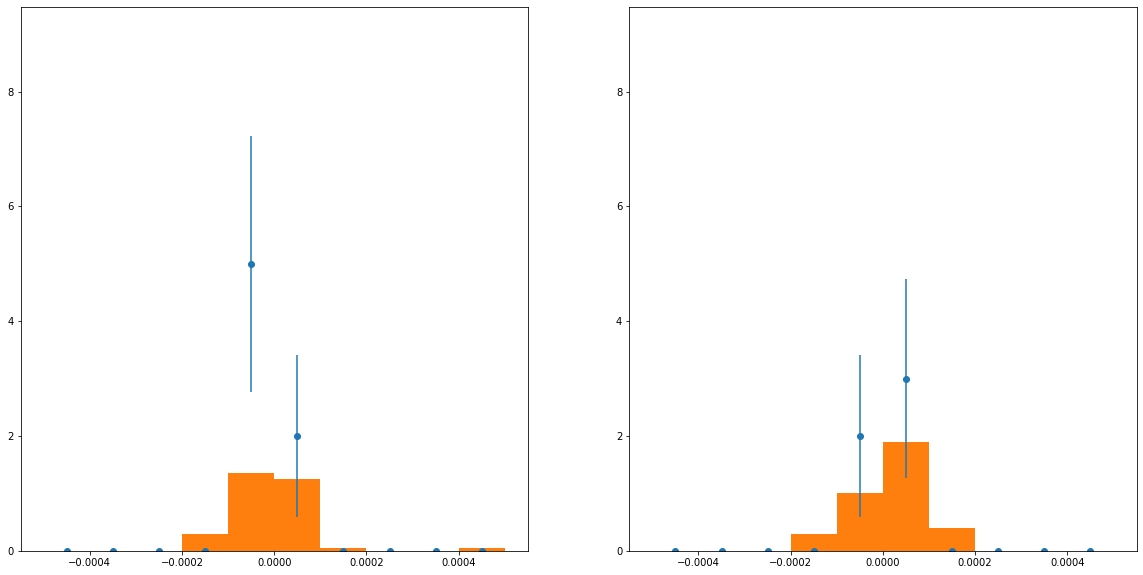

In [40]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

#var_ = "Xi"
#bins_ = 10
#range_ = (0.,0.2)

#var_ = "ThX"
#bins_ = 10
#range_ = (-0.0005,0.0005)

var_ = "ThY"
bins_ = 10
range_ = (-0.0005,0.0005)

#var_ = "T"
#bins_ = 10
#range_ = (-4.,0.)

#var_ = "Time"
#bins_ = 20
#range_ = (-0.5,0.5)

msk1_data_sel = ( vals_1 >= -0.20 ) & ( vals_1 <= +0.20 )
print ( df_data[ var_ ][ msk1_data ][ msk1_data_sel ] )

counts_1, bin_edges_1 = np.histogram( df_data[ var_ ][ msk1_data ][ msk1_data_sel ], bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

msk2_data_sel = ( vals_2 >= -0.20 ) & ( vals_2 <= +0.20 )
print ( df_data[ var_ ][ msk2_data ][ msk2_data_sel ] )

counts_2, bin_edges_2 = np.histogram( df_data[ var_ ][ msk2_data ][ msk2_data_sel ], bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

msk1_bkg_sel = ( vals_bkg_1 >= -0.20 ) & ( vals_bkg_1 <= +0.20 )
axes[0].hist( df_bkg[ var_ ][ msk1_bkg ][ msk1_bkg_sel ], bins=bins_, range=range_, weights=weights_1[ msk1_bkg_sel ] )
axes[0].set_ylim( top=y_max )

msk2_bkg_sel = ( vals_bkg_2 >= -0.20 ) & ( vals_bkg_2 <= +0.20 )
axes[1].hist( df_bkg[ var_ ][ msk2_bkg ][ msk2_bkg_sel ], bins=bins_, range=range_, weights=weights_2[ msk2_bkg_sel ] )
axes[1].set_ylim( top=y_max )